autor: Bruno Gonçalves Pereira
University of Sao Paulo, Oceanographic Institute

In [1]:
%matplotlib inline

# import libraries to read and plot statistical analyses of marine satellite data

import xarray as xr # netcdf4 library
import warnings
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec, ticker
from dask.diagnostics import ProgressBar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as cmo
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid
from scipy.ndimage.filters import gaussian_filter
import seawater as sw
import numpy as np

Traga os dados para o seu computador local - utilize este comando para acessar a série temporal de dados de temperatura de superficie do mar disponinilizadas pelo CMEMS no link: 

https://resources.marine.copernicus.eu/products

In [8]:
# #1997 to 2019

#comando                    adress                                    nome                                                    nome do produto                              - subset                                                                              #seleçao temporal           min         max                       - variavel                                                         local onde vai ser salvo no seu computador ee nome do arquivo               

# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "1997-01-01 12:00:00" --date-max "1997-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_1997_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "1998-01-01 12:00:00" --date-max "1998-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_1998_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "1999-01-01 12:00:00" --date-max "1999-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_1999_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2000-01-01 12:00:00" --date-max "2000-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2000_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2001-01-01 12:00:00" --date-max "2001-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2001_DAILY --user login --pwd
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2002-01-01 12:00:00" --date-max "2002-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2002_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2003-01-01 12:00:00" --date-max "2003-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2003_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2004-01-01 12:00:00" --date-max "2004-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2004_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2005-01-01 12:00:00" --date-max "2005-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2005_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2006-01-01 12:00:00" --date-max "2006-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2006_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2007-01-01 12:00:00" --date-max "2007-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2007_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2008-01-01 12:00:00" --date-max "2008-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2008_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2009-01-01 12:00:00" --date-max "2009-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2009_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2010-01-01 12:00:00" --date-max "2010-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2010_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2011-01-01 12:00:00" --date-max "2011-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2011_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2012-01-01 12:00:00" --date-max "2012-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2012_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2013-01-01 12:00:00" --date-max "2013-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2013_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2014-01-01 12:00:00" --date-max "2014-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2014_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2015-01-01 12:00:00" --date-max "2015-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2015_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2016-01-01 12:00:00" --date-max "2016-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2016_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2017-01-01 12:00:00" --date-max "2017-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2017_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2018-01-01 12:00:00" --date-max "2018-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2018_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2019-01-01 12:00:00" --date-max "2019-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2019_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2020-01-01 12:00:00" --date-max "2020-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2020_DAILY --user login --pwd senha/password


#### Load Sea Surface Temperature (SST) OSTIA rep-data ##### 

Os dados reprocessados do programa copernicus podem ser usados como exemplos para observaçao de séries climátológicas, a alta
resoluçao espacial 

In [3]:
source = xr.open_mfdataset('/home/br/git/CMEMS/ostia_data/SST*',concat_dim='time') #open multifile data in your computer
source = source.assign({'analysed_sst':source.analysed_sst-273}) # kelvin to celsius step
source.close()

In [4]:
# explore as variaveis e atributos dos dados de SST voce pode ter acesso a informaçoes importantes
# e caracteristicas

# print(source)
# print(source.var)
# print(source.attrs)

Gridded Bathymetry Data, GEBCO - IOC/UNESCO dataset 

https://www.gebco.net/data_and_products/gridded_bathymetry_data/#global


In [5]:
#  load/carregue os dados batimetria

dado = xr.open_dataset('/home/br/git/CMEMS/gebco-data/gebco_2020_n-20.0_s-40.0_w-60.0_e-40.0.nc')

bat = dado.interp({'lon':source.lon, 'lat':source.lat}).elevation

bat.close()

#### make a mask  - spatial selection

Seleçao de área: Aqui definimos nossa porção final de análise, uma área que corresponde a região costeira no litoral sudeste com definida por uma batimetria menor que 200

In [6]:
#mask
mask_sst = source.analysed_sst.sel(lon=slice(-55.0, -40.0), lat=slice(-35.0, -21.0)).where((bat>-200)&(bat<-10 ))
mask_sst_error = source.analysis_error.sel(lon=slice(-55.0, -40.0), lat=slice(-35.0, -21.0)).where((bat>-200)&(bat<-10 ))

#### mapas usando a biblioteca/librarie matplotlib

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


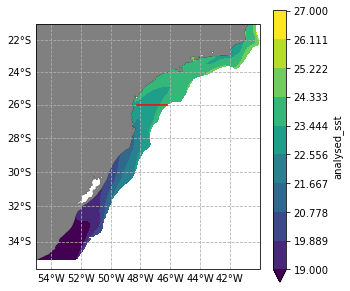

In [7]:
land = cfeature.NaturalEarthFeature(
    'physical','land','10m',edgecolor='face',facecolor='0.5'
)

proj = ccrs.Mercator()

kw = dict(transform=ccrs.PlateCarree())


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1,projection=proj)
mask_sst.mean('time').plot.contourf(ax=ax,vmin=19,vmax=27,levels=10,**kw)

ax.plot([-48.25,-46.20],[-26,-26],color='red',**kw,zorder=1e3)
ax.coastlines()
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True,linestyle='--')
gl.top_labels = False
gl.right_labels = False
ax.set_extent([
    -55, -40,
    -35.5, -21
],crs=ccrs.PlateCarree())

In [9]:
#hovmollers 

Text(0, 0.5, 'years')

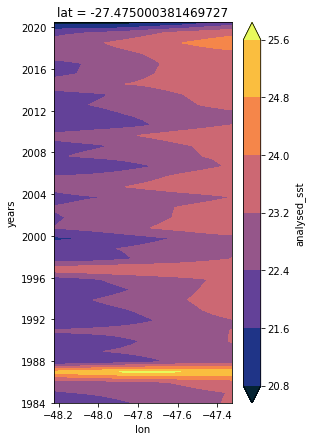

In [12]:
hov_subset = mask_sst.sel(lat = -27.5, method='nearest').sel(lon = slice(-48.25  , -47.3))

plt.figure(figsize=(4, 7))
hov_subset.resample(
        {'time':'360D'} # reagrupando os dados
    ).mean().plot.contourf(cmap= cmo.cm.thermal,robust=True)
plt.xlabel('lon')
plt.ylabel('years')
plt.title('SST ostia time serie ')

Text(0.5, 1.0, 'SST ostia time serie ')

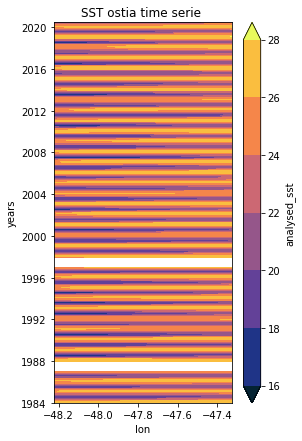

In [14]:
hov_subset = mask_sst.sel(lat = -27.5, method='nearest').sel(lon = slice(-48.25  , -47.3))

plt.figure(figsize=(4, 7))
hov_subset.resample(
        {'time':'30D'} # reagrupando os dados
    ).mean().plot.contourf(cmap= cmo.cm.thermal,robust=True)
plt.xlabel('lon')
plt.ylabel('years')
plt.title('SST ostia hovmoller time serie ')

In [15]:
#sel

médias mensais - month time serie

In [16]:
with ProgressBar():
    mean_sst = mask_sst.mean(['lon','lat']).compute()

[########################################] | 100% Completed | 28.3s


Text(0.5, 1.0, 'Sea Surface Temperature')

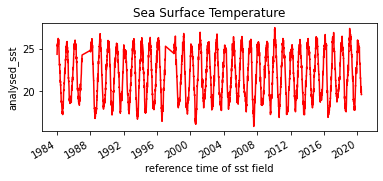

In [17]:
plt.figure(figsize=(6,2))
mean_sst.plot(x ="time" , color='red',linestyle='-')
plt.title('Sea Surface Temperature')

In [18]:
#sst_serie = mean_sst.to_series()
#sst_serie.to_csv('sst_time_series_from_netcdf.csv')
#ls

#### Agrupamentos a partir do programa groubby

possibilidade de agrupamentos dos dados:

ex: dataset. groupby("time.month").mean() para dados mensais

 time season group - Aqui temos a média para as 4 estações, ou seja, temos a estação média para a série temporal

In [19]:
season_sst = mask_sst.groupby("time.season").mean()
#season_sst_error = mask_sst_error.groupby("time.season").mean()#

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


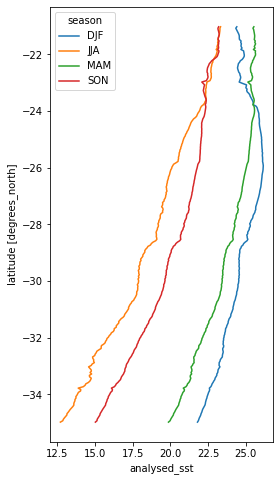

In [20]:
# #hue plot

plt.figure(figsize=(4,8))
season_sst.mean("lon").plot.line(hue="season", y="lat", add_legend=True) 


# challenge: 
    
#season_sst_error.mean("lon").plot.line(hue="season", y="lat", add_legend=True)

# fig,axes = plt.subplots(ncols=2, sharey=True, figsize=(4,8))

# im = season_sst.mean("lon").plot.line(ax=[0],hue="season", y="lat", add_legend=True) 

# axes[0].set_xlabel('Celsius')
# axes[0].set_title('sst')

# im = season_sst_error.mean("lon").plot.line(ax=[1],hue="season", y="lat", add_legend=True)

# axes[1].set_xlabel('%')
# axes[1].set_title('error_sst')

In [21]:
### definiçao de variaveis que representam estações ####

## classificando os dados conforme estações do ano ###

winter_sst = season_sst.sel(season='JJA')
summer_sst = season_sst.sel(season='DJF')
spring_sst = season_sst.sel(season='SON')
autumn_sst = season_sst.sel(season='MAM')

lon = season_sst.lon
lat = season_sst.lat

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1586: UserWarning: The following kwargs were not used by contour: 'shading'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


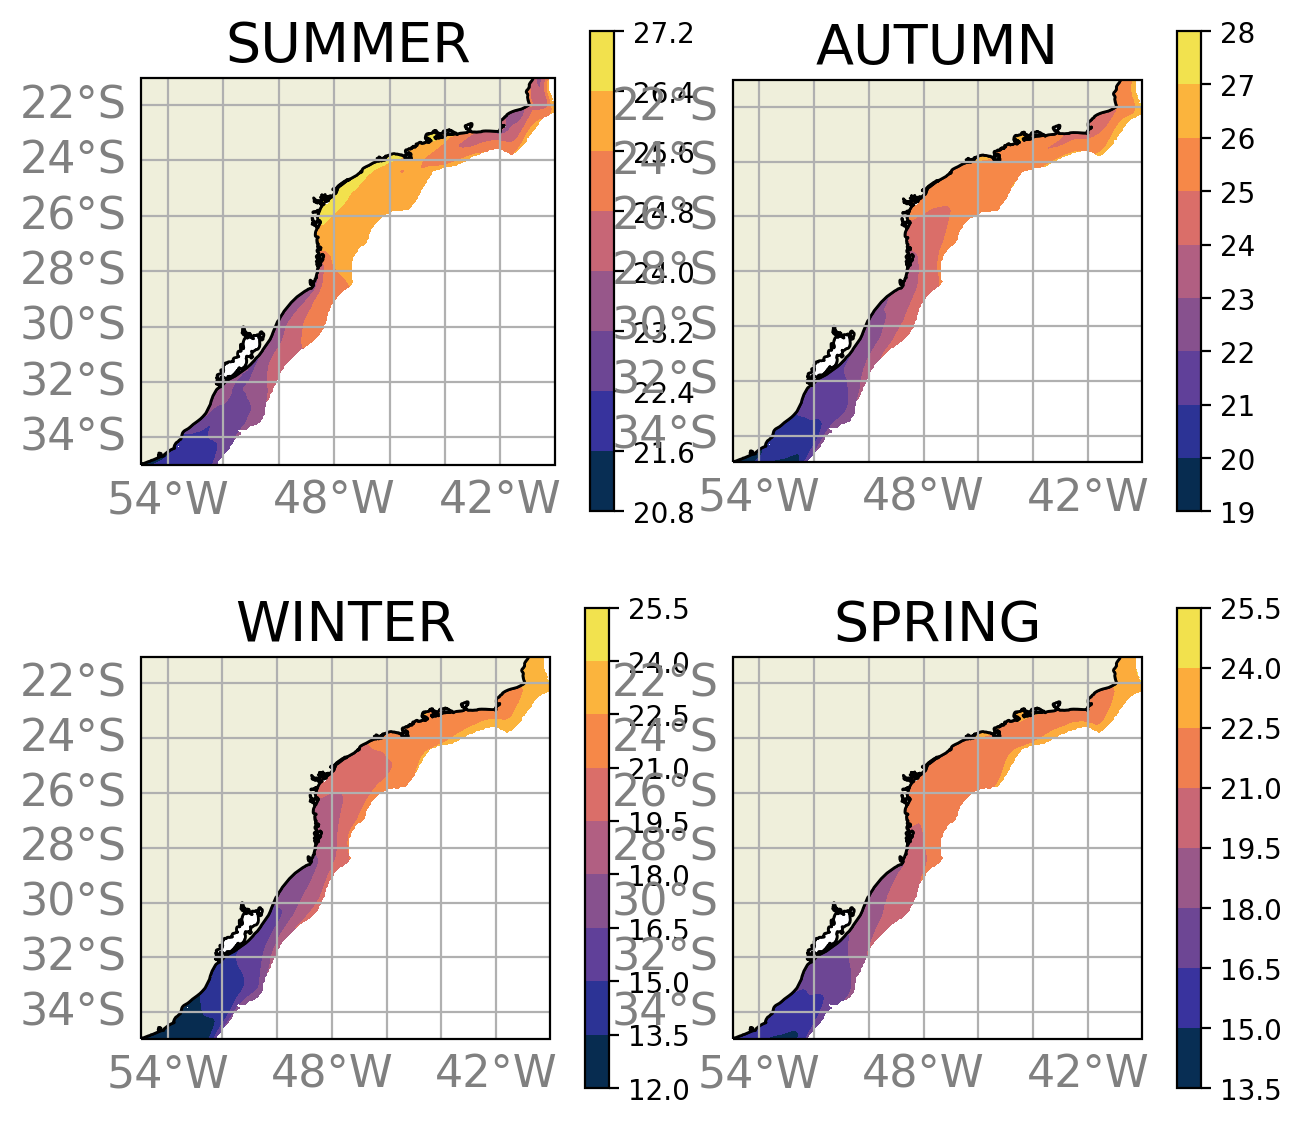

In [22]:
### CARTOPY SUBPLOT ###

land_resolution = '10m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

#%%capture

fig1 = plt.figure(figsize=(7, 7), dpi=200)

gs  = gridspec.GridSpec(2, 2)

#plot SUMMER

m = plt.subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f1 = plt.contourf(lon, lat, summer_sst, shading='flat', cmap=cmo.cm.thermal)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top= False
g1.ylabels_right = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f1, orientation="vertical", fraction=0.09, pad=0.07) #ticks=[]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('SUMMER', fontsize=20)

#plot AUTUMN
m = plt.subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f2 = plt.contourf(lon, lat, autumn_sst, shading='flat', cmap=cmo.cm.thermal)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g2 = m.gridlines(draw_labels = True)
g2.xlabels_top = False
g2.ylabels_right = False
g2.xlabel_style = {'size': 16, 'color': 'gray'}
g2.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f2, orientation="vertical", fraction=0.1, pad=0.07) #ticks=[]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('AUTUMN', fontsize=20)

#plot WINTER
m = plt.subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f3 = plt.contourf(lon, lat, winter_sst, shading='flat', cmap=cmo.cm.thermal)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g3 = m.gridlines(draw_labels = True)
g3.xlabels_top = False
g3.ylabels_right = False
g3.xlabel_style = {'size': 16, 'color': 'gray'}
g3.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f3, orientation="vertical", fraction=0.1, pad=0.07) #ticks=[]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('celsius, fontsize=20)
plt.title('WINTER', fontsize=20)

#plot SPRING

m = plt.subplot(gs[1,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f4 = plt.contourf(lon, lat, (spring_sst), shading='flat', cmap=cmo.cm.thermal)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g4 = m.gridlines(draw_labels = True)
g4.xlabels_top = False
g4.ylabels_right = False
g4.xlabel_style = {'size': 16, 'color': 'gray'}
g4.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f4, orientation="vertical", fraction=0.1, pad=0.07) #ticks=[n]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('celsius, fontsize=20)
plt.title('SPRING', fontsize=20)

# COLOBAR

#cbar = fig1.colorbar(ax=[f1,f2,f3,f4], orientation="vertical", aspect=50, fraction=0.02, pad=0.06)
#cbar.set_label(r'sea surface temperature')

plt.show()

In [ ]:
# mon_sst = mask_sst.sel(time=slice('1985','2019')).groupby('time.month').mean('time')

# with ProgressBar():
#     mean_m_sst = mon_sst.mean(['lon','lat']).compute() 

In [ ]:
# plt.figure(figsize=(6,2))
# mean_m_sst.plot(x ="month" , color='red',linestyle='-')
# plt.title('Sea Surface Temperature')

In [ ]:
# year_sst = mask_sst.sel(time=slice('1985','2019')).groupby('time.year').mean('time')

# with ProgressBar():
#     year_y_sst = year_sst.mean(['lon','lat']).compute() 

In [ ]:
# plt.figure(figsize=(6,2))
# year_y_sst.plot(x ="year" , color='red',linestyle='-')
# plt.title('Sea Surface Temperature')

In [ ]:
# pd_sst = ymean_sst.to_series()
# print(pd_sst)

In [ ]:
# #variância: média dos desvios quadráticos
# print(np.var(pd_sst))

In [ ]:
# #desvio padrão: raiz quadrada da variância
# print(np.std(pd_sst))

In [ ]:
# pd_sst.describe()

criando diagramas de hovmoller a partir de seçoes na batimetria

In [ ]:
# #------------------------- função montar uma matrix para um vetor de batimetria "suave"----------------------------------------------------

# def extract_bat(lon,lat,topo,level,flevel):
#     CT = plt.contour(gaussian_filter(lon,flevel),
#                      gaussian_filter(lat,flevel),gaussian_filter(topo,flevel),
#                      [level],colors='black',latlon=True,linewidths=0.7,linestyles='solid')
#     # CT = plt.contour(lon,lat,topo,[-100],colors='black',latlon=True,linewidths=0.7,linestyles='solid')
#     lli = []
#     for i in range(len(CT.allsegs[0])):
#         print(CT.allsegs[0][i].shape[0])
#         lli.append(CT.allsegs[0][i].shape[0])
        
#     lbat = CT.allsegs[0][np.argmax(lli)]
#     print('Maior shape é'.format(CT.allsegs[0][np.argmax(lli)].shape))

#     return lbat[:,0],lbat[:,1]


In [ ]:
# def hov_ext_sst_dist(x,y,sst_file):

#     hov_sst = []

#     xi,yi = x.copy(),y.copy() 

#     for i in range(len(xi)):
#         print("{:03.1f}%".format(100*(i+1)/len(xi)),end="\r")
#         hov_sst.append(sst_file.sel(lon=xi[i], lat=yi[i], method='nearest'))

#     hov_sst = xr.concat(hov_sst,dim='distance')
#     hov_sst = hov_sst.assign_coords({'distance':np.hstack([0,np.cumsum(sw.dist(yi,xi)[0])])}) #


#     with ProgressBar():
#         hov_sst = hov_sst.compute()
        
#     hov_sst = hov_sst.interpolate_na('distance').interpolate_na('time')
    
#     return hov_sst

In [ ]:
# xbat,ybat,zbat = bat.lat.values,bat.lon.values,bat.values

In [ ]:
# #----------- SELEÇÃO SEÇÕES DE ACORDO COM A BATIMETRIA SUAVE ---------------- #

# x, y =  extract_bat(ybat, xbat, zbat, level = -50, flevel = 10) # SELECIONANDO VETORES
# #x_1, y_1 = extract_bat(ybat, xbat, zbat, level = -100, flevel = 10)#
# #x_2, y_2 = extract_bat(ybat, xbat, zbat, level = -150, flevel = 10)
# x_3, y_3 = extract_bat(ybat, xbat, zbat, level = -200, flevel = 10)


# x,y = x[::10],y[::10]
# #x_1,y_1 = x_1[::10],y_1[::10] 
# #x_2,y_2 = x_2[::10],y_2[::10]
# x_3,y_3 = x_3[::10],y_3[::10]


In [ ]:
# ### APPLY HOV_EXT_DIST ###

# hov_data = hov_ext_dist(x,y,subset_file)
# hov_data = hov_ext_dist(x_3,y_3,subset_file)

In [ ]:
plt.figure(figsize=(8 ,2), dpi =200)
hov_chl_3.CHL.plot.contourf(y='latitude', cmap= cmo.cm.algae,robust=True)
plt.xlabel('month')
plt.ylabel('Latitude')
plt.title('Hovmoller Diagram of SST - Monthly-mean time-serie - 50 m')
plt.tight_layout()